# BigMart sales Prediction

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pickle
import warnings
warnings.filterwarnings('ignore')


# Read the Dataset

In [2]:
df=pd.read_csv("train.csv",header=0, sep=',',encoding='Latin1')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1305,12.857645,0,0.293066,9,177.0712,4,1985,2,0,0,351.5424
1,906,12.600000,0,0.024195,4,36.1874,8,1997,2,0,1,423.4488
2,1344,12.857645,0,0.181769,11,240.6196,5,1985,1,2,3,4579.3724
3,828,17.350000,1,0.063207,0,89.3830,2,2007,1,1,1,1258.3620
4,845,16.850000,0,0.139302,13,144.9760,1,1987,0,2,1,2783.0440


In [4]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3825 entries, 0 to 3824
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            3825 non-null   int64  
 1   Item_Weight                3825 non-null   float64
 2   Item_Fat_Content           3825 non-null   int64  
 3   Item_Visibility            3825 non-null   float64
 4   Item_Type                  3825 non-null   int64  
 5   Item_MRP                   3825 non-null   float64
 6   Outlet_Identifier          3825 non-null   int64  
 7   Outlet_Establishment_Year  3825 non-null   int64  
 8   Outlet_Size                3825 non-null   int64  
 9   Outlet_Location_Type       3825 non-null   int64  
 10  Outlet_Type                3825 non-null   int64  
 11  Item_Outlet_Sales          3825 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 358.7 KB


In [5]:
#Number of datapoints
df.shape

(3825, 12)

# Cleaning the dataset

In [6]:
#checking for null values
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# <font color="blue">Handling missing values </font>

In [7]:
#Finding Mean
df['Item_Weight'].mean()

12.919944469440141

In [8]:
#Filling the missing values of "Item_Weight" with mean 
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [9]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
df['Outlet_Size'].value_counts()

1    2342
2    1063
0     420
Name: Outlet_Size, dtype: int64

In [11]:
#Filling the missing values of "Outlet_size"
df.Outlet_Size = df.Outlet_Size.fillna('Medium')

In [12]:
#checking of the null values
df.apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
#getting the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3825 entries, 0 to 3824
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            3825 non-null   int64  
 1   Item_Weight                3825 non-null   float64
 2   Item_Fat_Content           3825 non-null   int64  
 3   Item_Visibility            3825 non-null   float64
 4   Item_Type                  3825 non-null   int64  
 5   Item_MRP                   3825 non-null   float64
 6   Outlet_Identifier          3825 non-null   int64  
 7   Outlet_Establishment_Year  3825 non-null   int64  
 8   Outlet_Size                3825 non-null   int64  
 9   Outlet_Location_Type       3825 non-null   int64  
 10  Outlet_Type                3825 non-null   int64  
 11  Item_Outlet_Sales          3825 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 358.7 KB


In [14]:
#chack for null values
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Visualizing the data using EDA

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Uni-variate Analysis

#  <font color = 'blue'> Numerical values</font>

(array([ 209.,  388.,  397.,  281., 1001.,  285.,  344.,  320.,  325.,
         275.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <BarContainer object of 10 artists>)

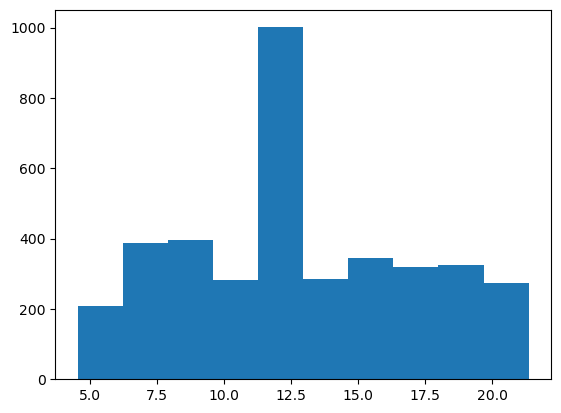

In [16]:
#Item_weight Distributions
plt.hist(df['Item_Weight'])

(array([1086., 1033.,  702.,  455.,  297.,  165.,   43.,   18.,    8.,
          18.]),
 array([0.        , 0.03048591, 0.06097182, 0.09145773, 0.12194364,
        0.15242955, 0.18291546, 0.21340137, 0.24388728, 0.27437319,
        0.3048591 ]),
 <BarContainer object of 10 artists>)

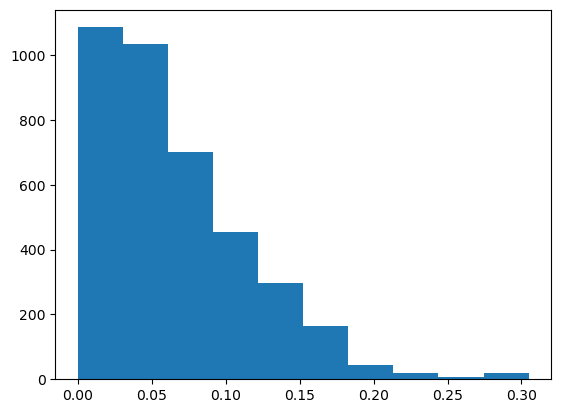

In [17]:
#Item_visibility Distributions
plt.hist(df['Item_Visibility'])

(array([409., 266., 458., 550., 367., 502., 540., 196., 264., 273.]),
 array([ 31.29   ,  54.84984,  78.40968, 101.96952, 125.52936, 149.0892 ,
        172.64904, 196.20888, 219.76872, 243.32856, 266.8884 ]),
 <BarContainer object of 10 artists>)

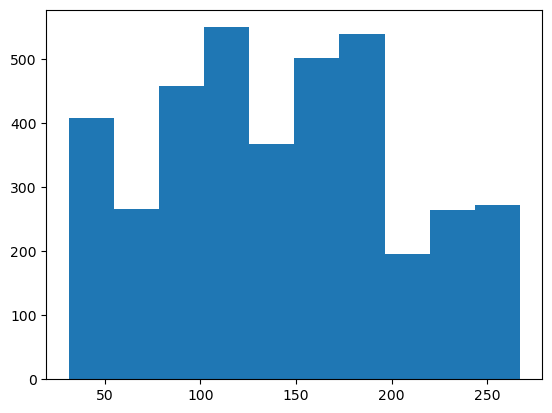

In [18]:
#Item_MRP Distributions
plt.hist(df['Item_MRP'])

(array([1.463e+03, 1.109e+03, 6.830e+02, 3.200e+02, 1.680e+02, 5.300e+01,
        2.100e+01, 7.000e+00, 0.000e+00, 1.000e+00]),
 array([   33.29   ,  1338.65748,  2644.02496,  3949.39244,  5254.75992,
         6560.1274 ,  7865.49488,  9170.86236, 10476.22984, 11781.59732,
        13086.9648 ]),
 <BarContainer object of 10 artists>)

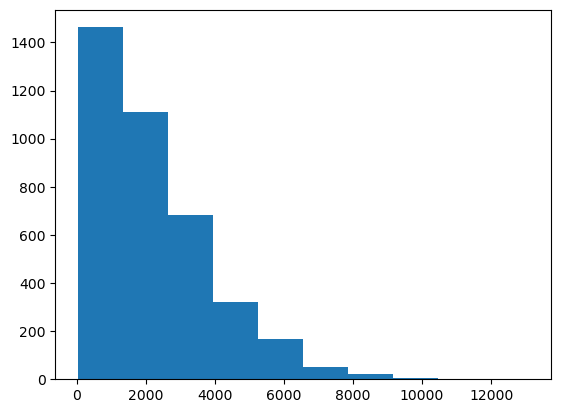

In [19]:
#Item_Outlet_Sales Distributions
plt.hist(df['Item_Outlet_Sales'])

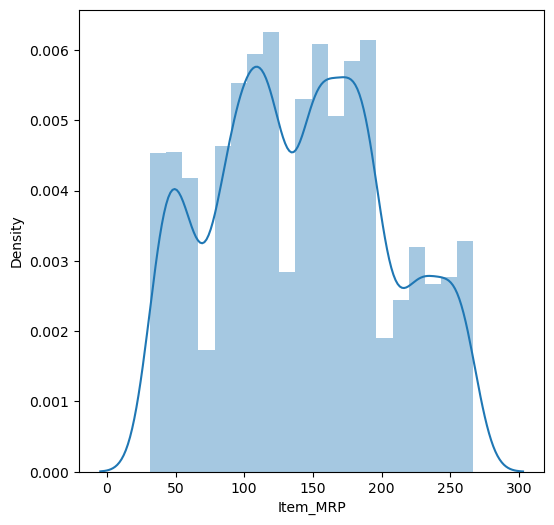

In [20]:
#Item_MRP using distplot Distributions
plt.figure(figsize=(6,6))
sns.distplot(df['Item_MRP'])
plt.show()

## <font color = 'blue'> Catagorical values</font>

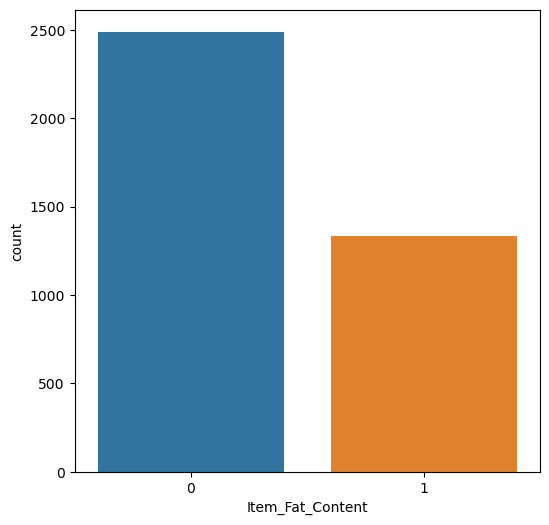

In [21]:
#Item_Fat_Content Distributions
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

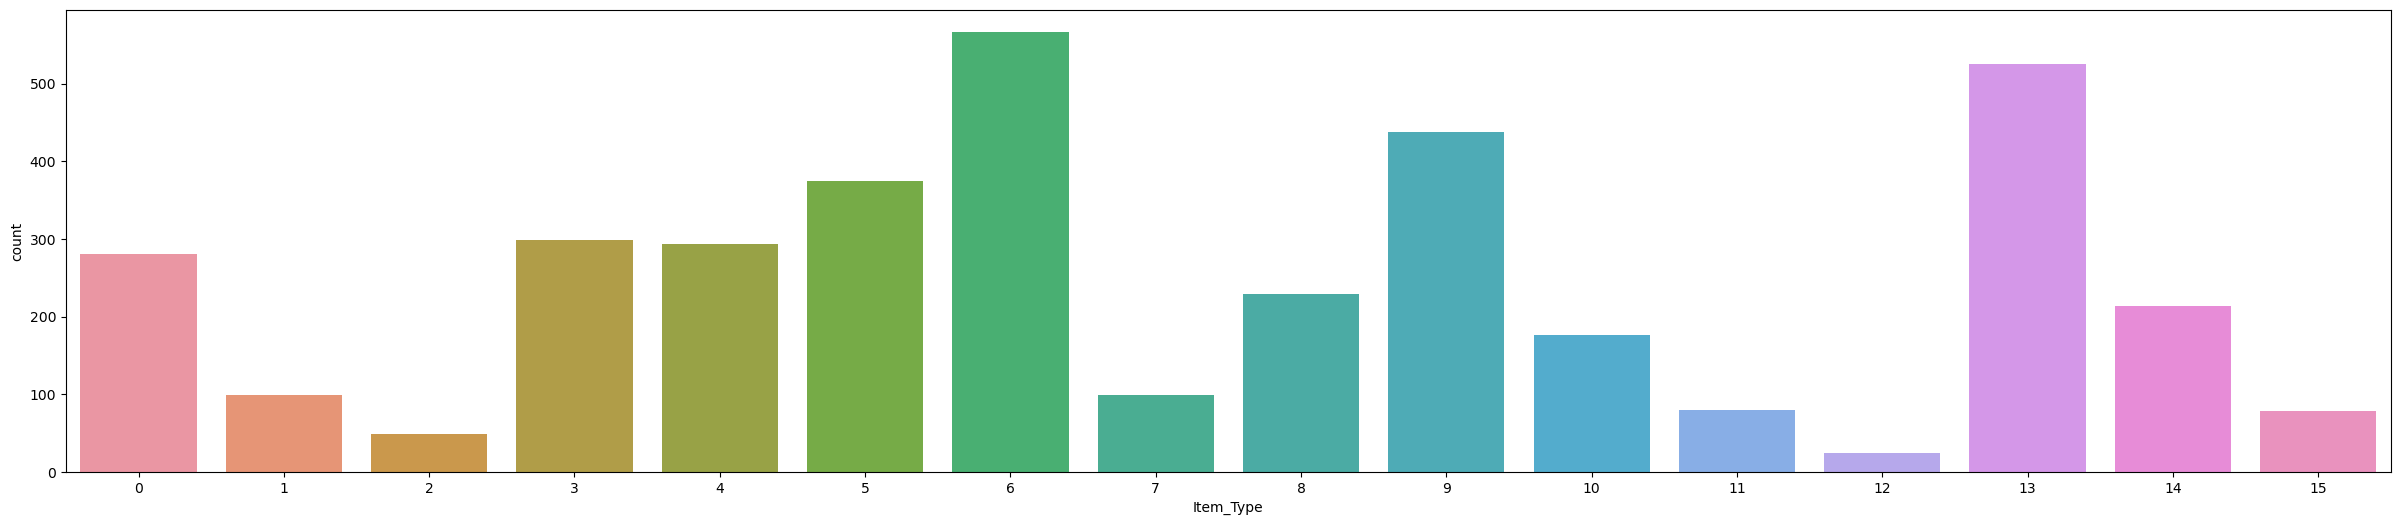

In [22]:
# Item_Type distribution
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=df)
plt.show()

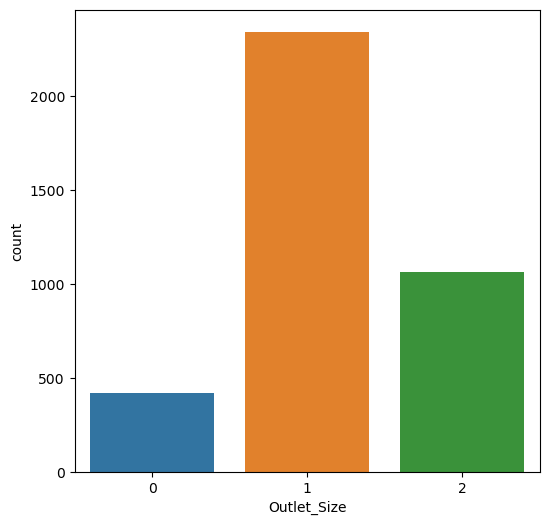

In [23]:
#Outlet_Size Distributions
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=df)
plt.show()

# Bi-variate Analysis

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

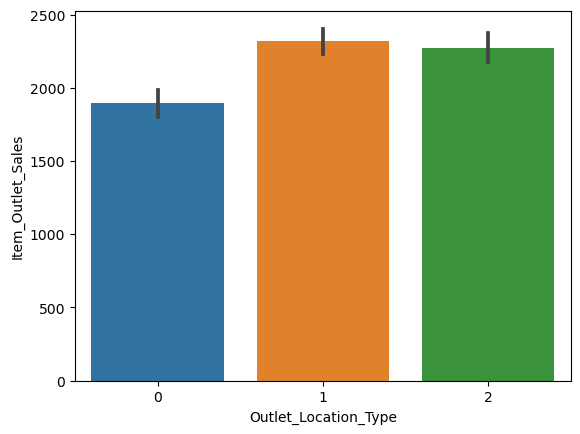

In [24]:
sns.barplot(df.Outlet_Location_Type,df.Item_Outlet_Sales)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

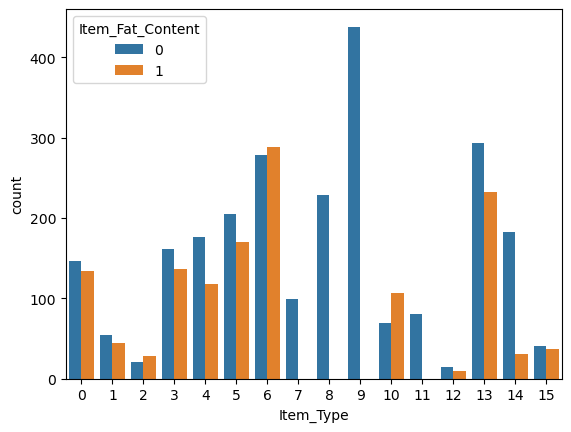

In [25]:
sns.countplot(df['Item_Type'],hue=df['Item_Fat_Content'])

## Multi-variate Analysis

<AxesSubplot:>

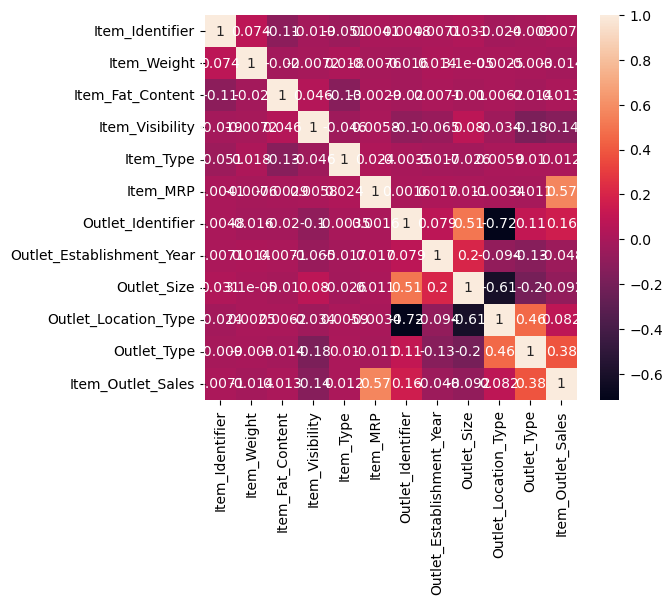

In [26]:
plt.figure(figsize = (6,5))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

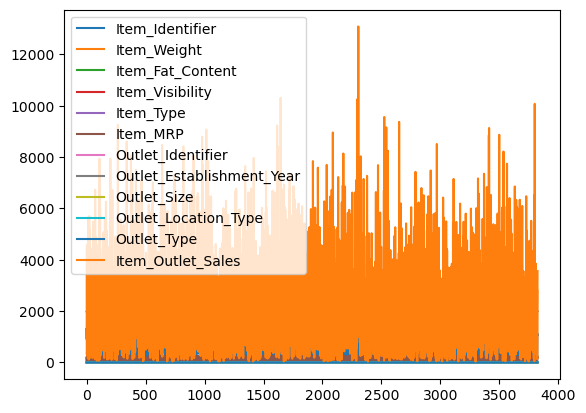

In [27]:
df.plot.line()

array([[<AxesSubplot:title={'center':'Item_Identifier'}>,
        <AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Fat_Content'}>],
       [<AxesSubplot:title={'center':'Item_Visibility'}>,
        <AxesSubplot:title={'center':'Item_Type'}>,
        <AxesSubplot:title={'center':'Item_MRP'}>],
       [<AxesSubplot:title={'center':'Outlet_Identifier'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>,
        <AxesSubplot:title={'center':'Outlet_Size'}>],
       [<AxesSubplot:title={'center':'Outlet_Location_Type'}>,
        <AxesSubplot:title={'center':'Outlet_Type'}>,
        <AxesSubplot:title={'center':'Item_Outlet_Sales'}>]], dtype=object)

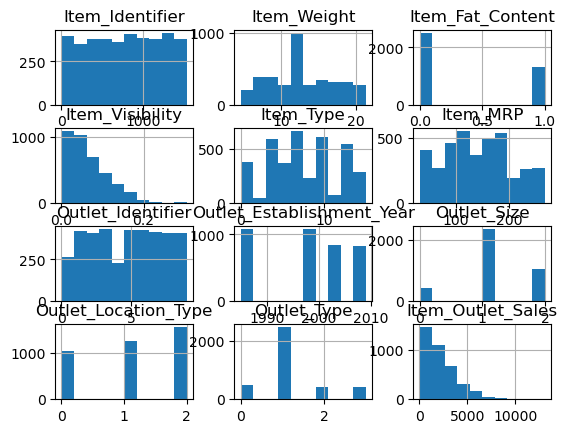

In [28]:
df.hist()

# Descriptive Analysis

In [29]:
#Describe of the dataframe
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000
mean,776.015425,12.919944,0.349020,0.065566,7.301961,141.647897,4.688889,1997.853333,1.168105,1.130196,1.208105,2186.547253
std,444.987570,4.244839,0.476722,0.050793,4.200276,62.653684,2.834697,8.386280,0.599623,0.811006,0.802772,1718.069813
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,397.000000,9.395000,0.000000,0.026954,4.000000,94.146200,2.000000,1987.000000,1.000000,0.000000,1.000000,829.586800
50%,788.000000,12.857645,0.000000,0.053524,6.000000,143.644400,5.000000,1999.000000,1.000000,1.000000,1.000000,1780.349200
75%,1159.000000,16.100000,1.000000,0.093766,10.000000,186.592400,7.000000,2004.000000,2.000000,2.000000,1.000000,3079.990800
max,1540.000000,21.350000,1.000000,0.304859,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


# Data pre-processing

In [30]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1305,12.857645,0,0.293066,9,177.0712,4,1985,2,0,0,351.5424
1,906,12.600000,0,0.024195,4,36.1874,8,1997,2,0,1,423.4488
2,1344,12.857645,0,0.181769,11,240.6196,5,1985,1,2,3,4579.3724
3,828,17.350000,1,0.063207,0,89.3830,2,2007,1,1,1,1258.3620
4,845,16.850000,0,0.139302,13,144.9760,1,1987,0,2,1,2783.0440


# Using EDA Checking Outliers

<AxesSubplot:ylabel='Density'>

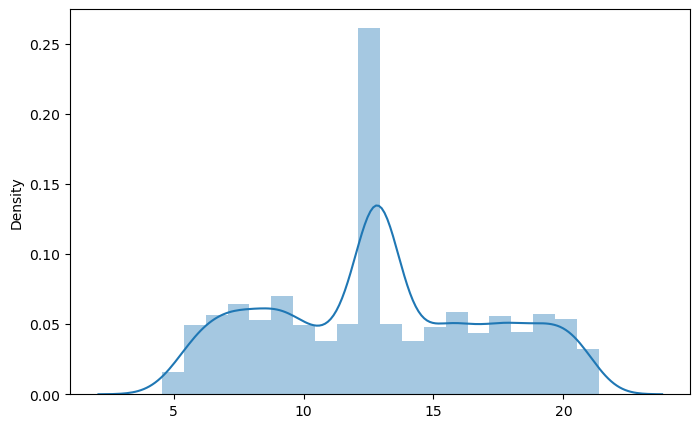

In [31]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.distplot(x=df['Item_Weight'])

In [32]:
df['Item_Fat_Content'].value_counts()

0    2490
1    1335
Name: Item_Fat_Content, dtype: int64

In [33]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [34]:
df['Item_Fat_Content'].value_counts()

0    2490
1    1335
Name: Item_Fat_Content, dtype: int64

# Label Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
encoder=LabelEncoder()

In [37]:
print(encoder)

LabelEncoder()


In [38]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])

df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])

df['Item_Type'] = encoder.fit_transform(df['Item_Type'])

df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])

df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])

df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])

df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [39]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1247,12.857645,0,0.293066,9,177.0712,4,1985,2,0,0,351.5424
1,863,12.600000,0,0.024195,4,36.1874,8,1997,2,0,1,423.4488
2,1284,12.857645,0,0.181769,11,240.6196,5,1985,1,2,3,4579.3724
3,788,17.350000,1,0.063207,0,89.3830,2,2007,1,1,1,1258.3620
4,805,16.850000,0,0.139302,13,144.9760,1,1987,0,2,1,2783.0440


# <font style='Italic'>Splitting the dataset </font>

In [40]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
train,test = train_test_split(df, test_size=0.33, random_state=42)

In [42]:
#Export of the train and test dataset
train.to_csv('train.csv',encoding='utf-8',index=False)
test.to_csv('test.csv',encoding='utf-8',index=False)

In [43]:
X = df.drop(['Item_Outlet_Sales','Outlet_Identifier','Item_Identifier'], axis=1)
Y = df['Item_Outlet_Sales']

In [44]:
print(X)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0       12.857645                 0         0.293066          9  177.0712   
1       12.600000                 0         0.024195          4   36.1874   
2       12.857645                 0         0.181769         11  240.6196   
3       17.350000                 1         0.063207          0   89.3830   
4       16.850000                 0         0.139302         13  144.9760   
...           ...               ...              ...        ...       ...   
3820    13.500000                 0         0.094366         14  190.9872   
3821    12.857645                 0         0.167725          5  128.3678   
3822     9.195000                 1         0.118149         13  160.5578   
3823     9.695000                 1         0.128283          0  226.1404   
3824    11.800000                 1         0.107057          4  224.1772   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0    

In [45]:
print(Y)

0        351.5424
1        423.4488
2       4579.3724
3       1258.3620
4       2783.0440
          ...    
3820    2836.3080
3821     127.1678
3822    1283.6624
3823    3375.6060
3824    3558.0352
Name: Item_Outlet_Sales, Length: 3825, dtype: float64


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Scaling the data

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
print(X.shape, X_train.shape, X_test.shape)

(3825, 9) (3060, 9) (765, 9)


# Model Building

# RandomForest Regression

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [50]:
regressor = RandomForestRegressor(n_estimators=1000,max_depth=10,random_state=34)
regressor.fit(X_train, np.ravel(Y_train,order='C'))

RandomForestRegressor(max_depth=10, n_estimators=1000, random_state=34)

# <font color=orange> Choose The Appropriate Model </font>

In [51]:
#predicting the values of test
y_pred = regressor.predict(X_test)


# <font color=orange> Check The Metrics Of The Model </font>

In [52]:
#the accuracy for test set
r2_score(y_pred,Y_test)

0.25096968046679113

# Linear Regresssion

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr=LinearRegression()

In [55]:
lr.fit(X_train, Y_train)

LinearRegression()

In [56]:
c=lr.intercept_
c

2178.511525228758

In [57]:
m=lr.coef_
m

array([ -22.53863361,   53.70065855,  -91.47287655,    7.88775726,
        957.66890593,    8.84218672, -227.70503092, -354.00141886,
        787.2394124 ])

# <font color=orange> Choose The Appropriate Model </font>

In [58]:
pred=lr.predict(X_test)

In [59]:
pred

array([ 3.58397380e+03,  1.29315812e+03,  2.99517889e+03,  2.49302413e+03,
        2.83849608e+03,  2.94609668e+03,  2.63708280e+03,  1.63027989e+03,
        2.23300833e+03,  2.44473789e+03,  2.05081262e+03,  3.89992273e+03,
        2.49829432e+02,  2.04977443e+03,  2.74032346e+03,  3.20897622e+03,
        1.20589672e+03,  3.41819754e+03,  1.51194628e+03, -2.26361986e+02,
        3.14050442e+03,  1.95834397e+03,  4.18457850e+03,  2.43269917e+03,
        3.06250339e+03,  2.00917689e+03,  3.16314414e+03,  3.28779389e+03,
        3.86731757e+03,  2.46528493e+03,  2.54681587e+03,  2.59294407e+03,
        1.49863340e+02,  4.27235135e+02,  3.90631187e+03,  2.67044047e+03,
        1.99994269e+03,  1.15871353e+03,  1.29126322e+03,  1.69353647e+03,
        2.98492029e+03,  2.65218851e+03,  2.03091702e+03,  2.52244136e+03,
        7.86672265e+02,  2.60359452e+03,  1.99786275e+03,  1.43230827e+03,
       -5.36244882e+02,  1.30896259e+03,  1.96178876e+03,  1.43040019e+03,
        1.89073880e+03,  

In [60]:
Y_test

1604    2508.7344
2608    1133.8574
101     2189.8162
3653    2137.8838
2355    1366.2216
          ...    
2602    3261.7542
119     1230.3984
3813    2021.3688
1605    1601.2490
3045    2290.3520
Name: Item_Outlet_Sales, Length: 765, dtype: float64

# <font color=orange> Check The Metrics Of The Model </font>

In [61]:
from sklearn.metrics import r2_score
r2_score(pred,Y_test)

-0.08044660428329475

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

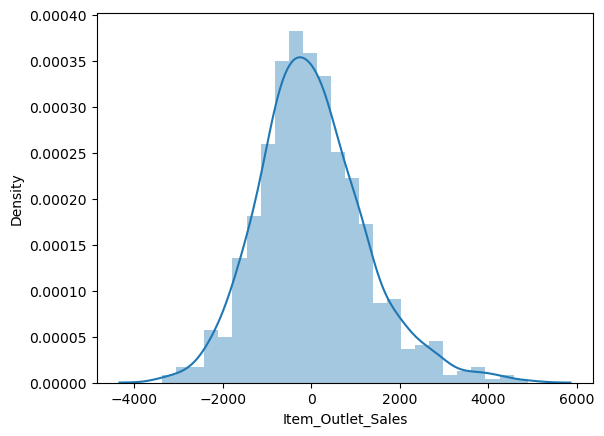

In [62]:
import seaborn as sns
sns.distplot(Y_test-pred)

# Regularized Regression

In [63]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1.0)

In [64]:
lasso.fit(X_train, Y_train)

Lasso()

# <font color=orange> Choose The Appropriate Model </font>

In [65]:
y_pred=lasso.predict(X_test)

In [66]:
y_pred

array([ 3.57530864e+03,  1.29261264e+03,  2.99409153e+03,  2.49147504e+03,
        2.83778933e+03,  2.94765907e+03,  2.63678378e+03,  1.62949065e+03,
        2.23309476e+03,  2.43740159e+03,  2.04943212e+03,  3.89867689e+03,
        2.54373597e+02,  2.04602210e+03,  2.73566309e+03,  3.20793954e+03,
        1.20461527e+03,  3.41467021e+03,  1.50781046e+03, -2.19878728e+02,
        3.13764946e+03,  1.96300232e+03,  4.18471711e+03,  2.43569564e+03,
        3.05999183e+03,  2.00674214e+03,  3.16265476e+03,  3.28887450e+03,
        3.86463465e+03,  2.46543487e+03,  2.54307303e+03,  2.58563149e+03,
        1.56569438e+02,  4.27351556e+02,  3.90351603e+03,  2.66863008e+03,
        1.99778922e+03,  1.15512237e+03,  1.29366082e+03,  1.69033561e+03,
        2.98185030e+03,  2.65487671e+03,  2.02838877e+03,  2.51769225e+03,
        7.88593253e+02,  2.59851041e+03,  1.99956499e+03,  1.43049250e+03,
       -5.28673241e+02,  1.30598270e+03,  1.96342906e+03,  1.42540222e+03,
        1.89285410e+03,  

In [67]:
print("Slope: %2f" % lasso.coef_[0])

Slope: -21.505275


In [68]:
print("Intercept is %2f " %lasso.intercept_)

Intercept is 2178.511525 


# <font color=orange> Check The Metrics Of The Model </font>

In [69]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_pred)

1475535.133156564

In [70]:
np.sqrt(mean_squared_error(Y_test, y_pred))

1214.7160710044814

In [71]:
print("Rsquared: %.2f" % lasso.score(X_test,Y_test))

Rsquared: 0.51


# XGBooster Regression

In [72]:
from xgboost import XGBRegressor

In [73]:
xg_reg = XGBRegressor()

In [74]:
xg_reg.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

# <font color=orange> Choose The Appropriate Model </font>

In [75]:
y_pred=xg_reg.predict(X_test)

In [76]:
y_pred

array([ 3.81542017e+03,  4.84159454e+02,  2.50354663e+03,  2.89815454e+03,
        2.00693799e+03,  2.50744946e+03,  2.43793066e+03,  2.26434546e+03,
        2.23417529e+03,  2.48053174e+03,  2.45689502e+03,  5.60575049e+03,
        5.51582886e+02,  1.91764575e+03,  2.40104907e+03,  4.46848340e+03,
        1.54101111e+03,  3.62897290e+03,  1.32355115e+03,  7.36225037e+02,
        1.80510217e+03,  4.29320068e+02,  4.30209229e+03,  3.46524097e+03,
        2.31734106e+03,  1.14524365e+03,  3.97908789e+03,  3.66444727e+03,
        4.15455225e+03,  2.57294507e+03,  1.47056470e+03,  4.57579688e+03,
        6.35565063e+02,  5.90708801e+02,  4.47575732e+03,  1.79659558e+03,
        2.65471021e+03,  1.00338989e+03,  1.04834802e+03,  2.16215796e+03,
        1.43133801e+03,  1.90462244e+03,  1.13108887e+03,  2.55036255e+03,
        1.13578625e+03,  3.68093481e+03,  2.65220435e+03,  1.71823645e+03,
        1.43997375e+02,  1.64014490e+03,  2.17679004e+03,  1.52805713e+03,
        1.03879138e+03,  

# <font color=orange> Check The Metrics Of The Model </font>

In [77]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test, y_pred)

In [78]:
print("MSE: %0.2f" % (mse))

MSE: 1648130.12


In [79]:
rmse=np.sqrt(mse)

In [80]:
print("RMSE: %0.2f" % (rmse))

RMSE: 1283.80


In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
model=XGBRegressor(objective="reg:squarederror")

In [83]:
scores=cross_val_score(model,X,Y, scoring="neg_mean_squared_error", cv=8)

In [84]:
scores

array([-1422276.42162288, -1388375.35338511, -1507363.71362264,
       -1576283.40740186, -1826567.45273629, -1453338.05546043,
       -1502469.89696633, -1706752.46723227])

In [85]:
rmse=np.sqrt(-scores)

In [86]:
print(rmse)

[1192.59231157 1178.29340717 1227.74741442 1255.50125743 1351.50562438
 1205.54471317 1225.75278787 1306.42736776]


## Saving the model

In [87]:
filename = 'predictsales_model.sav'
pickle.dump(xg_reg , open(filename, 'wb'))